
(1978 Automobile Data)


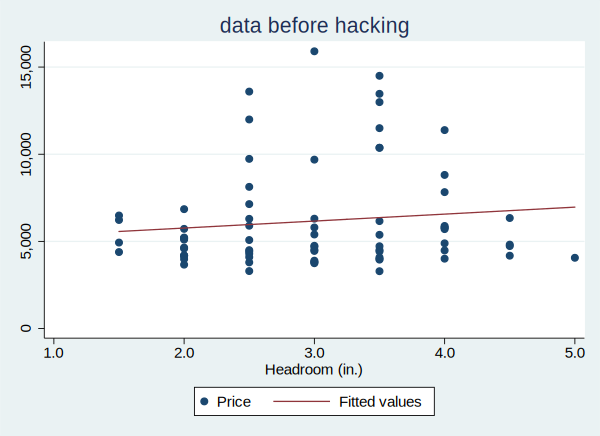

In [1]:
sysuse auto, clear

graph twoway scatter price headroom || lfit price headroom, name(g1, replace) title("data before hacking")

In [2]:
set seed 0

scalar p_value = 1
scalar j = 1

while p_value > 0.05{

    qui sysuse auto, clear

    qui sample 80

    qui reg price headroom

    matrix result   = r(table)
    scalar p_value  = result[4,1]
    scalar r2_value = e(r2)
    
    display 
    display "p-value hacking, round " j
    display "p-value is hacked to " p_value
    display "R^2     is hacked to " r2_value
    display 
    
    scalar j = j + 1

}






p-value hacking, round 1
p-value is hacked to .39342869
R^2     is hacked to .01280725


p-value hacking, round 2
p-value is hacked to .2242282
R^2     is hacked to .02580316


p-value hacking, round 3
p-value is hacked to .38720789
R^2     is hacked to .01314567


p-value hacking, round 4
p-value is hacked to .63535823
R^2     is hacked to .00397182


p-value hacking, round 5
p-value is hacked to .32988121
R^2     is hacked to .01666167


p-value hacking, round 6
p-value is hacked to .27379929
R^2     is hacked to .02097248


p-value hacking, round 7
p-value is hacked to .43455572
R^2     is hacked to .01074868


p-value hacking, round 8
p-value is hacked to .50436101
R^2     is hacked to .00785796


p-value hacking, round 9
p-value is hacked to .19663615
R^2     is hacked to .02907483


p-value hacking, round 10
p-value is hacked to .32316119
R^2     is hacked to .01712702


p-value hacking, round 11
p-value is hacked to .46263838
R^2     is hacked to .00950286


p-value hacking

In [3]:
reg price headroom


      Source |       SS           df       MS      Number of obs   =        59
-------------+----------------------------------   F(1, 57)        =      4.31
       Model |  36708214.5         1  36708214.5   Prob > F        =    0.0424
    Residual |   485210126        57  8512458.36   R-squared       =    0.0703
-------------+----------------------------------   Adj R-squared   =    0.0540
       Total |   521918341        58  8998592.08   Root MSE        =    2917.6

------------------------------------------------------------------------------
       price |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    headroom |   1075.897   518.1036     2.08   0.042     38.41254    2113.382
       _cons |   2965.798   1587.258     1.87   0.067    -212.6314    6144.227
------------------------------------------------------------------------------


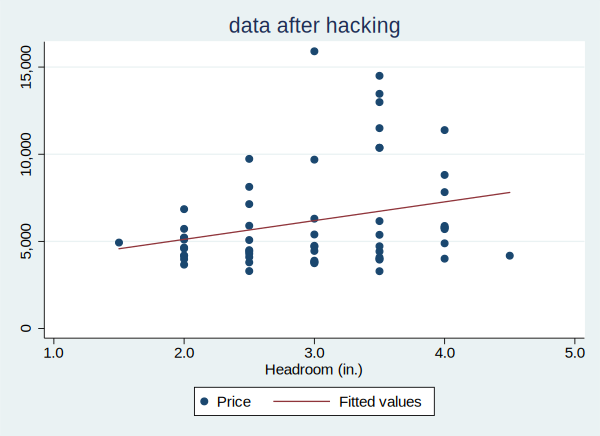

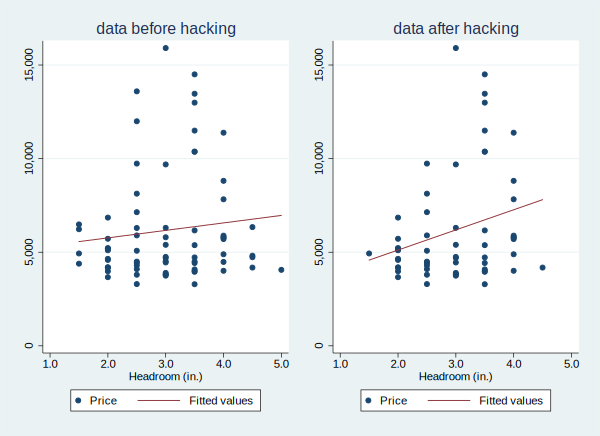

In [4]:
twoway scatter price headroom || lfit price headroom, name(g2, replace) title("data after hacking")

graph combine g1 g2, col(2) name(combined, replace)

In [5]:
bootstrap _b[headroom], nodots reps(1000): regress price headroom


Linear regression                               Number of obs     =         59
                                                Replications      =      1,000

      command:  regress price headroom
        _bs_1:  _b[headroom]

------------------------------------------------------------------------------
             |   Observed   Bootstrap                         Normal-based
             |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       _bs_1 |   1075.897   403.3563     2.67   0.008     285.3332    1866.461
------------------------------------------------------------------------------


In [6]:
sample 60

qui sum price, detail
gen price_demean = price - r(mean)

qui sum headroom, detail
gen headroom_demean = headroom - r(mean)

gen yhat = 2965.798 + 1075.897 * headroom_demean
gen ehat = price_demean - yhat

qui sum ehat, detail
scalar SSR_u = r(Var)*(r(N)-1)

qui sum price_demean, detail
scalar SSR_r = r(Var)*(r(N)-1)

scalar F_value = (SSR_r - SSR_u)/(SSR_u/(r(N)-2))
scalar p_value = Ftail(1, r(N)-2, F_value)


(24 observations deleted)














In [7]:
scalar list SSR_r SSR_u F_value p_value

     SSR_r =  2.736e+08
     SSR_u =  2.515e+08
   F_value =  2.9090098
   p_value =   .0974832


In [8]:
!rm -rf while_loop.html
!jupyter nbconvert --to html while_loop.ipynb





[NbConvertApp] Converting notebook while_loop.ipynb to html
[NbConvertApp] Writing 716843 bytes to while_loop.html
